In [1]:
#######################################################################
# This is where you can see the data analysis of your Google Takeout
# location data. Go to config.py for setup.
#######################################################################


import locdatalib
import config
import matplotlib.pyplot as plt
from pylab import rcParams

config.init()
# TODO Refer to RescueTime data for debugging

In [2]:
# location_entries stores the data parsed from Google Takeout JSON file
location_entries = locdatalib.get_locations(config.LOC_FILEPATH)  # Performance bottleneck

#TODO: write a function that tells the user the date range that their location data covers

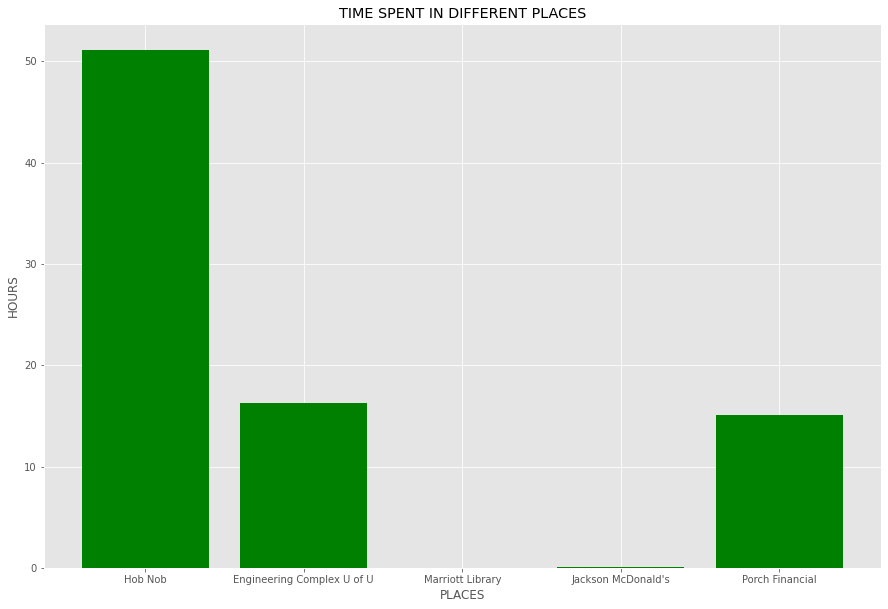

In [3]:
#----------------------------------
# Bar Chart
#----------------------------------

# Settings for the bar chart
rcParams['figure.figsize'] = 15, 10
plt.style.use('ggplot')

# Setting up parameters for the bar chart
x = [elem.name for elem in config.MY_PLACES]
x_pos = [i for i, _ in enumerate(x)]
y = locdatalib.calc_hours_from_list_of_places(config.MY_PLACES,
    config.START_TIME, config.END_TIME, location_entries)

# Creation and appearance of the bar chart
plt.bar(x_pos, y, color='green')
plt.xlabel("PLACES")
plt.ylabel("HOURS")
plt.title("TIME SPENT IN DIFFERENT PLACES")
plt.xticks(x_pos, x)

# Display the bar chart
plt.show()

    

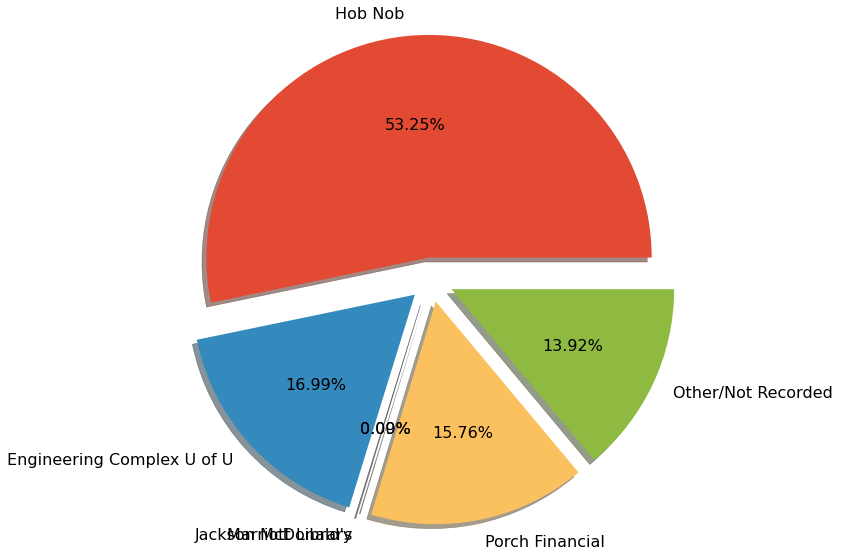

In [4]:
#--------------------------------
# Pie Chart
#--------------------------------

# Settings for the pie chart
plt.rcParams['font.size'] = 16.0

# Setting up the parameters for the pie chart
labels = [elem.name for elem in config.MY_PLACES]
labels.append("Other/Not Recorded")
# Calculate the time spent in each place of interest
times = locdatalib.calc_hours_from_list_of_places(config.MY_PLACES,config.START_TIME, config.END_TIME, location_entries)
times.append(locdatalib.calc_other_and_unsure_time
    (times, location_entries, config.START_TIME, config.END_TIME))  # Append 'Other/Not Recorded' time to the list
total_time = locdatalib.get_total_time_on_interval(config.START_TIME, config.END_TIME)  # Get the total time in the interval
percentages = [(time / total_time) * 100  for time in times]  # Calculate the percentage for places of interest

# Creation and apperance of the pie chart
explode = [.1] * len(times)
pie_fig, pie_ax = plt.subplots()
pie_ax.pie(times, labels=labels, shadow=True, explode=explode, autopct='%1.2f%%')
pie_ax.axis('equal')

# Display the pie chart
plt.show()